## BCGX Churn Analysis

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

---
## 2. Load data

In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

client_df["date_activ"] = pd.to_datetime(client_df["date_activ"],format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"],format='%Y-%m-%d') 
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"],format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"],format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'],format='%Y-%m-%d')

In [3]:
analysed_data=client_df.merge(price_df, how ='inner', on=['id'])

In [4]:
analysed_data.to_csv("analysed_data.csv")

In [5]:
df = pd.read_csv('./analysed_data.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [6]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


## 4.Data Cleaning 

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      175149 non-null  int64         
 1   id                              175149 non-null  object        
 2   channel_sales                   175149 non-null  object        
 3   cons_12m                        175149 non-null  int64         
 4   cons_gas_12m                    175149 non-null  int64         
 5   cons_last_month                 175149 non-null  int64         
 6   date_activ                      175149 non-null  datetime64[ns]
 7   date_end                        175149 non-null  datetime64[ns]
 8   date_modif_prod                 175149 non-null  datetime64[ns]
 9   date_renewal                    175149 non-null  datetime64[ns]
 10  forecast_cons_12m               175149 non-null  float64

In [9]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [10]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [11]:
offpeak_diff_dec_january_energy=diff['offpeak_diff_dec_january_energy']
offpeak_diff_dec_january_power=diff['offpeak_diff_dec_january_power']
df['offpeak_diff_dec_january_energy']= offpeak_diff_dec_january_energy
df['offpeak_diff_dec_january_power']= offpeak_diff_dec_january_power

### Adding the Month and  Year  the Subscription ended Feature

This is necessary as it will help us to further understand which months have the most churns.
With this data we can know which years and months had the most churned customers.


In [12]:
month_ended= df['date_end'].dt.month
year_ended= df['date_end'].dt.year
df['month_sub_ended']=month_ended
df['year_sub_ended']=year_ended 

### Adding the Month and Year the Subscription Began Feature
This is necessary as it will help us to further understand which months have the most churns. With this data we can know which years and months had the most subscriptions.

In [13]:
month_activ= df['date_activ'].dt.month
year_active= df['date_activ'].dt.year
df['month_sub_began']=month_activ
df['year_sub_began']=year_active 

### Adding the number of years a customer was subscribed
This will help us know how long a customer had a subscription 

In [14]:
Num_of_sub_years= df['year_sub_ended'] - df['year_sub_began']
Num_of_sub_years

0         3
1         3
2         3
3         3
4         3
         ..
175144    7
175145    7
175146    7
175147    7
175148    7
Length: 175149, dtype: int32

In [15]:
Num_of_sub_years.unique()

array([ 3,  7,  6,  5,  4, 11, 12,  9, 10,  8, 13,  2], dtype=int32)

#####  Adding Num_of_sub_years to the dataframe

In [16]:
df['Num_of_sub_years']=Num_of_sub_years

In [17]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16096 entries, 0 to 16095
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Unnamed: 0                       16096 non-null  int64         
 1   id                               16096 non-null  object        
 2   channel_sales                    16096 non-null  object        
 3   cons_12m                         16096 non-null  int64         
 4   cons_gas_12m                     16096 non-null  int64         
 5   cons_last_month                  16096 non-null  int64         
 6   date_activ                       16096 non-null  datetime64[ns]
 7   date_end                         16096 non-null  datetime64[ns]
 8   date_modif_prod                  16096 non-null  datetime64[ns]
 9   date_renewal                     16096 non-null  datetime64[ns]
 10  forecast_cons_12m                16096 non-null  float64       

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16096 entries, 0 to 16095
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Unnamed: 0                       16096 non-null  int64         
 1   id                               16096 non-null  object        
 2   channel_sales                    16096 non-null  object        
 3   cons_12m                         16096 non-null  int64         
 4   cons_gas_12m                     16096 non-null  int64         
 5   cons_last_month                  16096 non-null  int64         
 6   date_activ                       16096 non-null  datetime64[ns]
 7   date_end                         16096 non-null  datetime64[ns]
 8   date_modif_prod                  16096 non-null  datetime64[ns]
 9   date_renewal                     16096 non-null  datetime64[ns]
 10  forecast_cons_12m                16096 non-null  float64       

In [19]:
df=df.drop(columns=['Unnamed: 0','date_activ','date_end','date_modif_prod','date_renewal','price_date'])           

We will transform features, channel_sales, has_gas , origin_up

In [20]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,month_sub_ended,year_sub_ended,month_sub_began,year_sub_began,Num_of_sub_years
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,40.565969,24.339581,16.226389,-0.006192,0.162916,6,2016,6,2013,3
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,40.565969,24.339581,16.226389,-0.004104,0.177779,6,2016,6,2013,3
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,40.565973,24.339578,16.226383,0.050443,1.500000,6,2016,6,2013,3
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,40.565973,24.339578,16.226383,-0.010018,0.162916,6,2016,6,2013,3
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,40.565973,24.339578,16.226383,-0.003994,-0.000001,6,2016,6,2013,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,0082e565c1298cbe9cf70e96f571e4fa,MISSING,9779,351,0,1449.57,0,0.0,22.37,0.146348,...,44.266930,0.000000,0.000000,-0.050232,-0.335085,12,2016,12,2009,7
16092,e84c8b7d0e7e31cfebb07f46ac7445cf,usilxuppasemubllopkaafesmlibmsdf,7273,186456,651,1058.00,651,0.0,21.51,0.143459,...,44.266931,0.000000,0.000000,-0.003778,0.177779,12,2016,10,2011,5
16093,e84c8b7d0e7e31cfebb07f46ac7445cf,usilxuppasemubllopkaafesmlibmsdf,7273,186456,651,1058.00,651,0.0,21.51,0.143459,...,44.266931,0.000000,0.000000,-0.001760,0.164916,12,2016,10,2011,5
16094,e84c8b7d0e7e31cfebb07f46ac7445cf,usilxuppasemubllopkaafesmlibmsdf,7273,186456,651,1058.00,651,0.0,21.51,0.143459,...,44.266931,0.000000,0.000000,-0.009391,0.162916,12,2016,10,2011,5


In [21]:
df['channel_sales']=df['channel_sales'].astype('category')


In [22]:
df['channel_sales'].unique

<bound method Series.unique of 0        foosdfpfkusacimwkcsosbicdxkicaua
1        foosdfpfkusacimwkcsosbicdxkicaua
2        foosdfpfkusacimwkcsosbicdxkicaua
3        foosdfpfkusacimwkcsosbicdxkicaua
4        foosdfpfkusacimwkcsosbicdxkicaua
                       ...               
16091                             MISSING
16092    usilxuppasemubllopkaafesmlibmsdf
16093    usilxuppasemubllopkaafesmlibmsdf
16094    usilxuppasemubllopkaafesmlibmsdf
16095    usilxuppasemubllopkaafesmlibmsdf
Name: channel_sales, Length: 16096, dtype: category
Categories (6, object): ['MISSING', 'epumfxlbckeskwekxbiuasklxalciiuu', 'ewpakwlliwisiwduibdlfmalxowmwpci', 'foosdfpfkusacimwkcsosbicdxkicaua', 'lmkebamcaaclubfxadlmueccxoimlema', 'usilxuppasemubllopkaafesmlibmsdf']>

In [23]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')


In [24]:
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,year_sub_ended,month_sub_began,year_sub_began,Num_of_sub_years,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2016,6,2013,3,False,False,False,True,False,False
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2016,6,2013,3,False,False,False,True,False,False
2,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2016,6,2013,3,False,False,False,True,False,False
3,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2016,6,2013,3,False,False,False,True,False,False
4,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2016,6,2013,3,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,0082e565c1298cbe9cf70e96f571e4fa,9779,351,0,1449.57,0,0.0,22.37,0.146348,0.000000,...,2016,12,2009,7,True,False,False,False,False,False
16092,e84c8b7d0e7e31cfebb07f46ac7445cf,7273,186456,651,1058.00,651,0.0,21.51,0.143459,0.000000,...,2016,10,2011,5,False,False,False,False,False,True
16093,e84c8b7d0e7e31cfebb07f46ac7445cf,7273,186456,651,1058.00,651,0.0,21.51,0.143459,0.000000,...,2016,10,2011,5,False,False,False,False,False,True
16094,e84c8b7d0e7e31cfebb07f46ac7445cf,7273,186456,651,1058.00,651,0.0,21.51,0.143459,0.000000,...,2016,10,2011,5,False,False,False,False,False,True


In [25]:

df['channel_foosdfpfkusacimwkcsosbicdxkicaua'] = df['channel_foosdfpfkusacimwkcsosbicdxkicaua'].astype(int)
df['channel_lmkebamcaaclubfxadlmueccxoimlema'] = df['channel_lmkebamcaaclubfxadlmueccxoimlema'].astype(int)
df['channel_usilxuppasemubllopkaafesmlibmsdf'] = df['channel_usilxuppasemubllopkaafesmlibmsdf'].astype(int)
df['channel_epumfxlbckeskwekxbiuasklxalciiuu'] = df['channel_epumfxlbckeskwekxbiuasklxalciiuu'].astype(int)
df['channel_ewpakwlliwisiwduibdlfmalxowmwpci'] = df['channel_ewpakwlliwisiwduibdlfmalxowmwpci'].astype(int)
df['channel_MISSING'] = df['channel_MISSING'].astype(int)

In [26]:
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    8008
kamkkxfxxuwbdslkwifmmcsiusiuosws    4660
ldkssxwpmemidmecebumciepifcamkci    3320
MISSING                               96
usapbepcfoloekilkwsdiboslwaxobdp      12
Name: count, dtype: int64

In [27]:
df['origin_up']=df['origin_up'].astype('category')
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin')

In [28]:
df.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_MISSING,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,origin_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,0,0,1,0,0,False,False,False,True,False
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,0,0,1,0,0,False,False,False,True,False
2,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,0,0,1,0,0,False,False,False,True,False
3,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,0,0,1,0,0,False,False,False,True,False
4,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,0,0,1,0,0,False,False,False,True,False


In [29]:
df['has_gas']=df['has_gas'].replace(['t','f'],[1,0])


In [30]:
df['origin_MISSING'] = df['origin_MISSING'].astype(int)
df['origin_kamkkxfxxuwbdslkwifmmcsiusiuosws'] = df['origin_kamkkxfxxuwbdslkwifmmcsiusiuosws'].astype(int)
df['origin_ldkssxwpmemidmecebumciepifcamkci'] = df['origin_ldkssxwpmemidmecebumciepifcamkci'].astype(int)
df['origin_lxidpiddsbxsbosboudacockeimpuepw'] = df['origin_lxidpiddsbxsbosboudacockeimpuepw'].astype(int)
df['origin_usapbepcfoloekilkwsdiboslwaxobdp'] = df['origin_usapbepcfoloekilkwsdiboslwaxobdp'].astype(int)

In [31]:
df=df.drop(columns=['origin_MISSING'])

In [32]:
df=df.drop(columns=['origin_usapbepcfoloekilkwsdiboslwaxobdp']) 

In [33]:
df.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,Num_of_sub_years,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,3,0,0,0,1,0,0,0,0,1
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,3,0,0,0,1,0,0,0,0,1
2,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,3,0,0,0,1,0,0,0,0,1
3,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,3,0,0,0,1,0,0,0,0,1
4,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,3,0,0,0,1,0,0,0,0,1


In [34]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,Num_of_sub_years,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
count,1.609600e+04,1.609600e+04,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.845098e+05,2.719006e+04,18905.320017,1865.804304,1392.183710,0.754473,61.423871,0.136953,0.050508,43.031996,...,5.469371,0.253479,0.001491,0.052187,0.456511,0.144570,0.091762,0.289513,0.206262,0.497515
std,6.764478e+05,1.621541e+05,73714.458229,2070.775602,3251.282295,4.564172,62.350370,0.023509,0.048753,4.219230,...,1.575340,0.435016,0.038587,0.222411,0.498121,0.351678,0.288699,0.453550,0.404634,0.500009
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.443000e+03,0.000000e+00,0.000000,506.300000,0.000000,0.000000,16.210000,0.116509,0.000000,40.606701,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.370400e+04,0.000000e+00,716.500000,1155.130000,282.000000,0.000000,18.885000,0.143166,0.084138,44.311378,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.768800e+04,0.000000e+00,3218.000000,2497.090000,1650.000000,0.000000,130.680000,0.146348,0.098858,44.311378,...,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,6.207104e+06,1.959386e+06,771203.000000,18481.680000,63969.000000,30.000000,407.970000,0.273963,0.146676,59.266378,...,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the standard deviation from df we are able to tell which features are skewed

In [35]:
skewed=["cons_12m","cons_gas_12m","cons_last_month","forecast_cons_12m","forecast_cons_year","forecast_discount_energy","net_margin","num_years_antig","pow_max","margin_gross_pow_ele","margin_net_pow_ele","price_off_peak_fix","price_peak_fix","price_mid_peak_fix","Num_of_sub_years","year_sub_began"]

In [36]:
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,net_margin,num_years_antig,pow_max,margin_gross_pow_ele,margin_net_pow_ele,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Num_of_sub_years,year_sub_began
count,1.609600e+04,1.609600e+04,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.845098e+05,2.719006e+04,18905.320017,1865.804304,1392.183710,0.754473,189.584069,5.004100,18.267222,25.488077,25.488077,42.878016,9.429787,6.170364,5.469371,2010.591016
std,6.764478e+05,1.621541e+05,73714.458229,2070.775602,3251.282295,4.564172,221.948627,1.527906,13.899618,21.172846,21.172846,4.053394,12.018919,7.864916,1.575340,1.570160
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.464000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2003.000000
25%,5.443000e+03,0.000000e+00,0.000000,506.300000,0.000000,0.000000,52.940000,4.000000,12.500000,14.640000,14.640000,40.728885,0.000000,0.000000,4.000000,2010.000000
50%,1.370400e+04,0.000000e+00,716.500000,1155.130000,282.000000,0.000000,116.450000,5.000000,13.856000,22.520000,22.520000,44.266930,0.000000,0.000000,5.000000,2011.000000
75%,3.768800e+04,0.000000e+00,3218.000000,2497.090000,1650.000000,0.000000,255.210000,6.000000,19.800000,30.220000,30.220000,44.266931,24.339581,16.226389,6.000000,2012.000000
max,6.207104e+06,1.959386e+06,771203.000000,18481.680000,63969.000000,30.000000,3323.020000,12.000000,260.000000,248.640000,248.640000,59.444710,36.490689,16.958222,13.000000,2013.000000


#### Transformation of skewed data

In [37]:
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["forecast_discount_energy"] = np.log10(df["forecast_discount_energy"] + 1)
df["net_margin"] = np.log10(df["net_margin"] + 1)
df["num_years_antig"] = np.log10(df["num_years_antig"] + 1)
df["pow_max"] = np.log10(df["pow_max"] + 1)
df["margin_gross_pow_ele"] = np.log10(df["margin_gross_pow_ele"] + 1)
df["margin_net_pow_ele"] = np.log10(df["margin_net_pow_ele"] + 1)
df["price_off_peak_fix"] = np.log10(df["price_off_peak_fix"] + 1)
df["price_peak_fix"] = np.log10(df["price_peak_fix"] + 1)
df["price_mid_peak_fix"] = np.log10(df["price_mid_peak_fix"] + 1)
df["Num_of_sub_years"] = np.log10(df["Num_of_sub_years"] + 1)
df["year_sub_began"] = np.log10(df["year_sub_began"] + 1)


In [38]:
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,net_margin,num_years_antig,pow_max,margin_gross_pow_ele,margin_net_pow_ele,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Num_of_sub_years,year_sub_began
count,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.189114,0.800043,2.194268,2.960570,1.745475,0.039241,2.016341,0.765596,1.234090,1.323332,1.323332,1.634672,0.538989,0.471655,0.798810,3.303540
std,0.959502,1.724448,1.801889,0.705170,1.589486,0.236401,0.560335,0.104334,0.182737,0.316746,0.316746,0.125987,0.684617,0.599389,0.101556,0.000339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.602060,0.649724,0.000000,0.000000,0.000000,0.000000,0.000000,0.602060,3.301898
25%,3.735918,0.000000,0.000000,2.705265,0.000000,0.000000,1.731911,0.698970,1.130334,1.194237,1.194237,1.620437,0.000000,0.000000,0.698970,3.303412
50%,4.136879,0.000000,2.855817,3.063007,2.451786,0.000000,2.069853,0.778151,1.171902,1.371437,1.371437,1.655781,0.000000,0.000000,0.778151,3.303628
75%,4.576215,0.000000,3.507721,3.397608,3.217747,0.000000,2.408596,0.845098,1.318063,1.494433,1.494433,1.655781,1.403799,1.236194,0.845098,3.303844
max,6.792889,6.292120,5.887169,4.266765,4.805976,1.491362,3.521664,1.113943,2.416641,2.397314,2.397314,1.781358,1.573923,1.254263,1.146128,3.304059


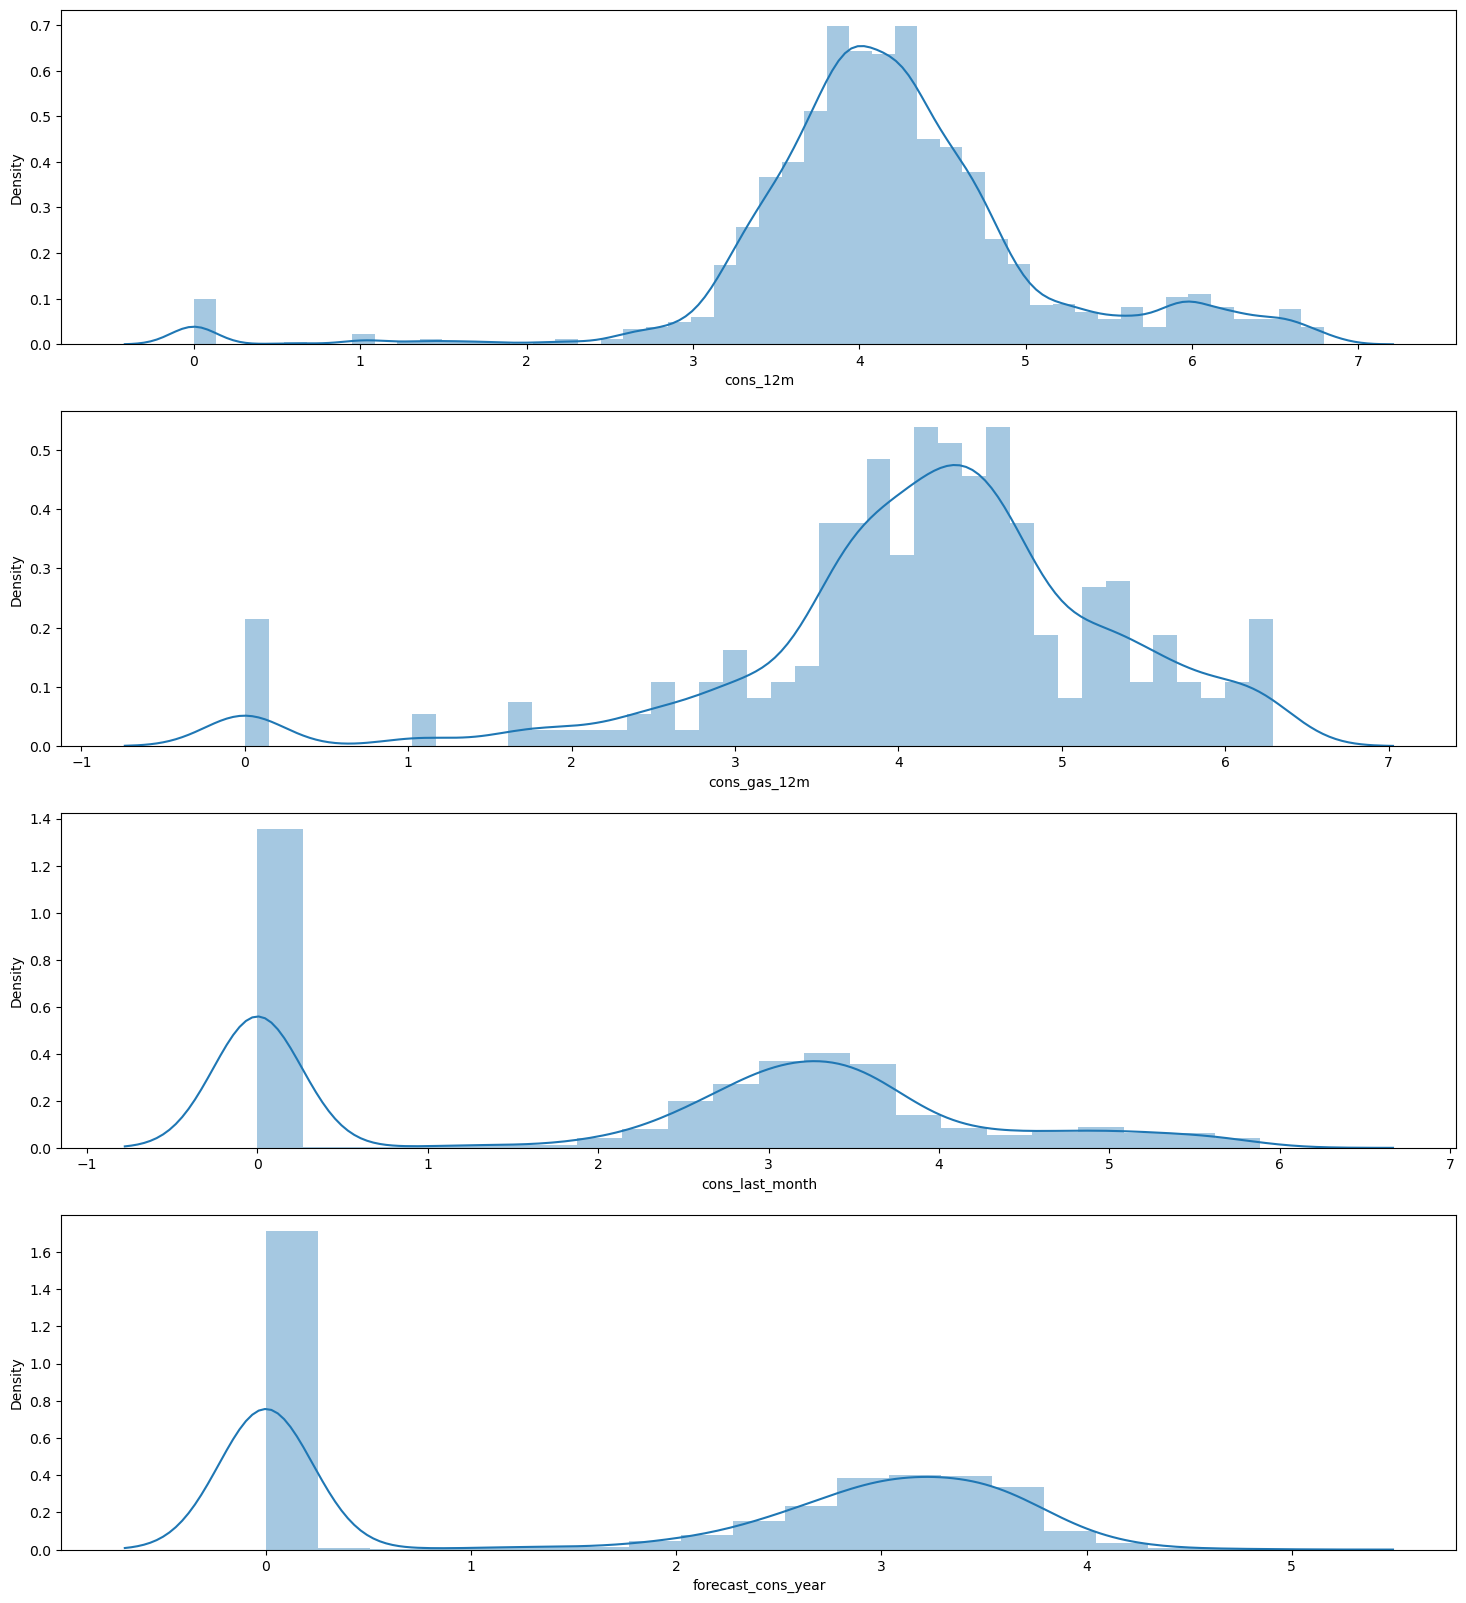

In [39]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0]) 
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) 
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((df["forecast_cons_year"].dropna()), ax=axs[3])
plt.show()

Features cons_gas_12m, cons_last_month, forecast_cons_year still show some level of skewness

In [40]:
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,net_margin,num_years_antig,pow_max,margin_gross_pow_ele,margin_net_pow_ele,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Num_of_sub_years,year_sub_began
count,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.189114,0.800043,2.194268,2.960570,1.745475,0.039241,2.016341,0.765596,1.234090,1.323332,1.323332,1.634672,0.538989,0.471655,0.798810,3.303540
std,0.959502,1.724448,1.801889,0.705170,1.589486,0.236401,0.560335,0.104334,0.182737,0.316746,0.316746,0.125987,0.684617,0.599389,0.101556,0.000339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.602060,0.649724,0.000000,0.000000,0.000000,0.000000,0.000000,0.602060,3.301898
25%,3.735918,0.000000,0.000000,2.705265,0.000000,0.000000,1.731911,0.698970,1.130334,1.194237,1.194237,1.620437,0.000000,0.000000,0.698970,3.303412
50%,4.136879,0.000000,2.855817,3.063007,2.451786,0.000000,2.069853,0.778151,1.171902,1.371437,1.371437,1.655781,0.000000,0.000000,0.778151,3.303628
75%,4.576215,0.000000,3.507721,3.397608,3.217747,0.000000,2.408596,0.845098,1.318063,1.494433,1.494433,1.655781,1.403799,1.236194,0.845098,3.303844
max,6.792889,6.292120,5.887169,4.266765,4.805976,1.491362,3.521664,1.113943,2.416641,2.397314,2.397314,1.781358,1.573923,1.254263,1.146128,3.304059


In [41]:
df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power',
       'month_sub_ended', 'year_sub_ended', 'month_sub_began',
       'year_sub_began', 'Num_of_sub_years', 'channel_MISSING',
       'channel_epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_usilxuppasemub

In [42]:
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,Num_of_sub_years,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,0.602060,0,0,0,1,0,0,0,0,1
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,0.602060,0,0,0,1,0,0,0,0,1
2,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,0.602060,0,0,0,1,0,0,0,0,1
3,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,0.602060,0,0,0,1,0,0,0,0,1
4,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,0.602060,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,0082e565c1298cbe9cf70e96f571e4fa,3.990339,2.546543,0.000000,3.161539,0.000000,0.0,1.368659,0.146348,0.000000,...,0.903090,1,0,0,0,0,0,1,0,0
16092,e84c8b7d0e7e31cfebb07f46ac7445cf,3.861773,5.270579,2.814248,3.024896,2.814248,0.0,1.352375,0.143459,0.000000,...,0.778151,0,0,0,0,0,1,1,0,0
16093,e84c8b7d0e7e31cfebb07f46ac7445cf,3.861773,5.270579,2.814248,3.024896,2.814248,0.0,1.352375,0.143459,0.000000,...,0.778151,0,0,0,0,0,1,1,0,0
16094,e84c8b7d0e7e31cfebb07f46ac7445cf,3.861773,5.270579,2.814248,3.024896,2.814248,0.0,1.352375,0.143459,0.000000,...,0.778151,0,0,0,0,0,1,1,0,0


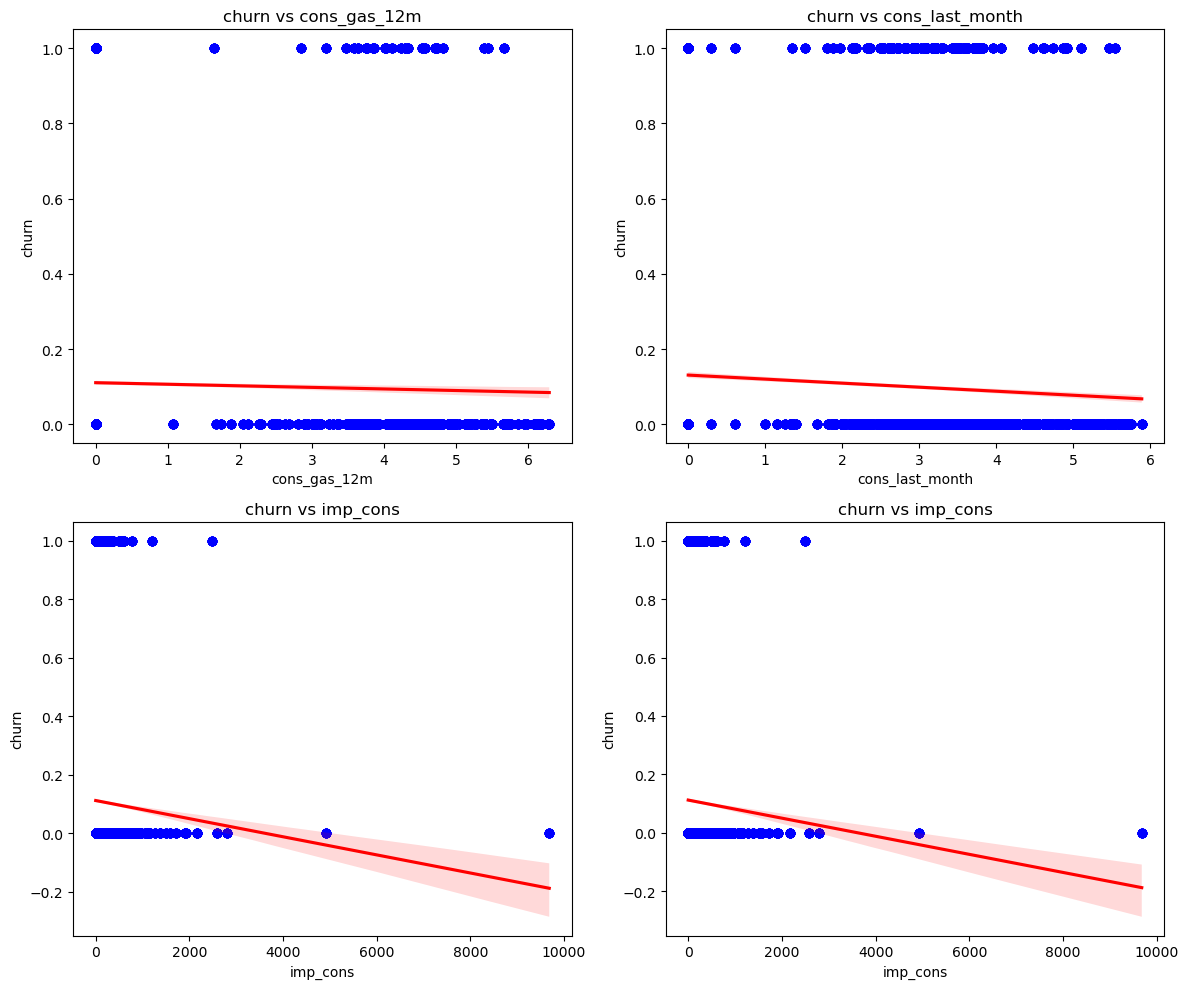

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Regression plot for 'cons_12m' vs 'cons_gas_12m'
sns.regplot(y='churn', x='cons_gas_12m', data=df,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axs[0, 0])
axs[0, 0].set_title('churn vs cons_gas_12m')

# Regression plot for 'cons_12m' vs 'cons_last_month'
sns.regplot(y='churn', x='cons_last_month', data=df,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axs[0, 1])
axs[0, 1].set_title('churn vs cons_last_month')

# Regression plot for 'cons_12m' vs 'imp_cons'
sns.regplot(y='churn', x='imp_cons', data=df,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axs[1, 0])
axs[1, 0].set_title('churn vs imp_cons')

# Regression plot for 'cons_gas_12m' vs 'imp_cons'
sns.regplot(y='churn', x='imp_cons', data=df,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axs[1, 1])
axs[1, 1].set_title('churn vs imp_cons')


plt.tight_layout()

plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [45]:
Y = df['churn']
X = df.drop(columns=['id', 'churn'])
X_train, X_tests, Y_train, Y_tests = train_test_split(X, Y, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_tests.shape,  Y_tests.shape)

Train set: (11267, 40) (11267,)
Test set: (4829, 40) (4829,)


In [46]:
def model_fit_predict(model, X, Y, X_predict):
    model.fit(X,Y)
    return model.predict(X_predict)
def acc_score(Y_true, Y_pred):
    return accuracy_score(Y_true, Y_pred)
def pre_score(Y_true,Y_pred):
    return precision_score(Y_true, Y_pred)
def f_score(Y_true, Y_pred):
    return f1_score(Y_true, Y_pred)

In [47]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import svm

In [48]:
model1 = RandomForestClassifier(n_estimators=1000)

Y_pred_test = model_fit_predict(model1, X_train, Y_train, X_tests)

#f1 score for training data
f1 = round(f1_score(Y_tests, Y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(Y_tests, Y_pred_test),2) 

#precision score for training data
pre = round(precision_score(Y_tests, Y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 1.0, 1.0 and 1.0 respectively


In [49]:
from sklearn import metrics
predictions1 = model1.predict(X_tests)
tn, fp, fn, tp = metrics.confusion_matrix(Y_tests, predictions1).ravel()
Y_tests.value_counts()


print(f"True positives: {tp}") 
print(f"False positives: {fp}") 
print(f"True negatives: {tn}") 
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(Y_tests, predictions1)}") 
print(f"Precision: {metrics.precision_score(Y_tests, predictions1)}") 
print(f"Recall: {metrics.recall_score(Y_tests, predictions1)}")

True positives: 572
False positives: 0
True negatives: 4257
False negatives: 0

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


1.0

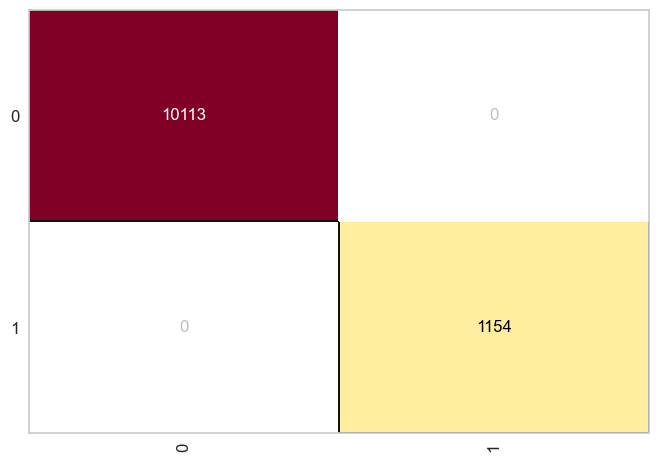

In [50]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
cm1= ConfusionMatrix(model1, classes=[0,1])
cm1.fit(X_train, Y_train)

cm1.score(X_train, Y_train)

### Evaluating Features to fix Overfitting

In [51]:
feature_importances = pd.DataFrame({'features': X_train.columns,'importance': model1.feature_importances_}).sort_values(by='importance', ascending=True).reset_index()

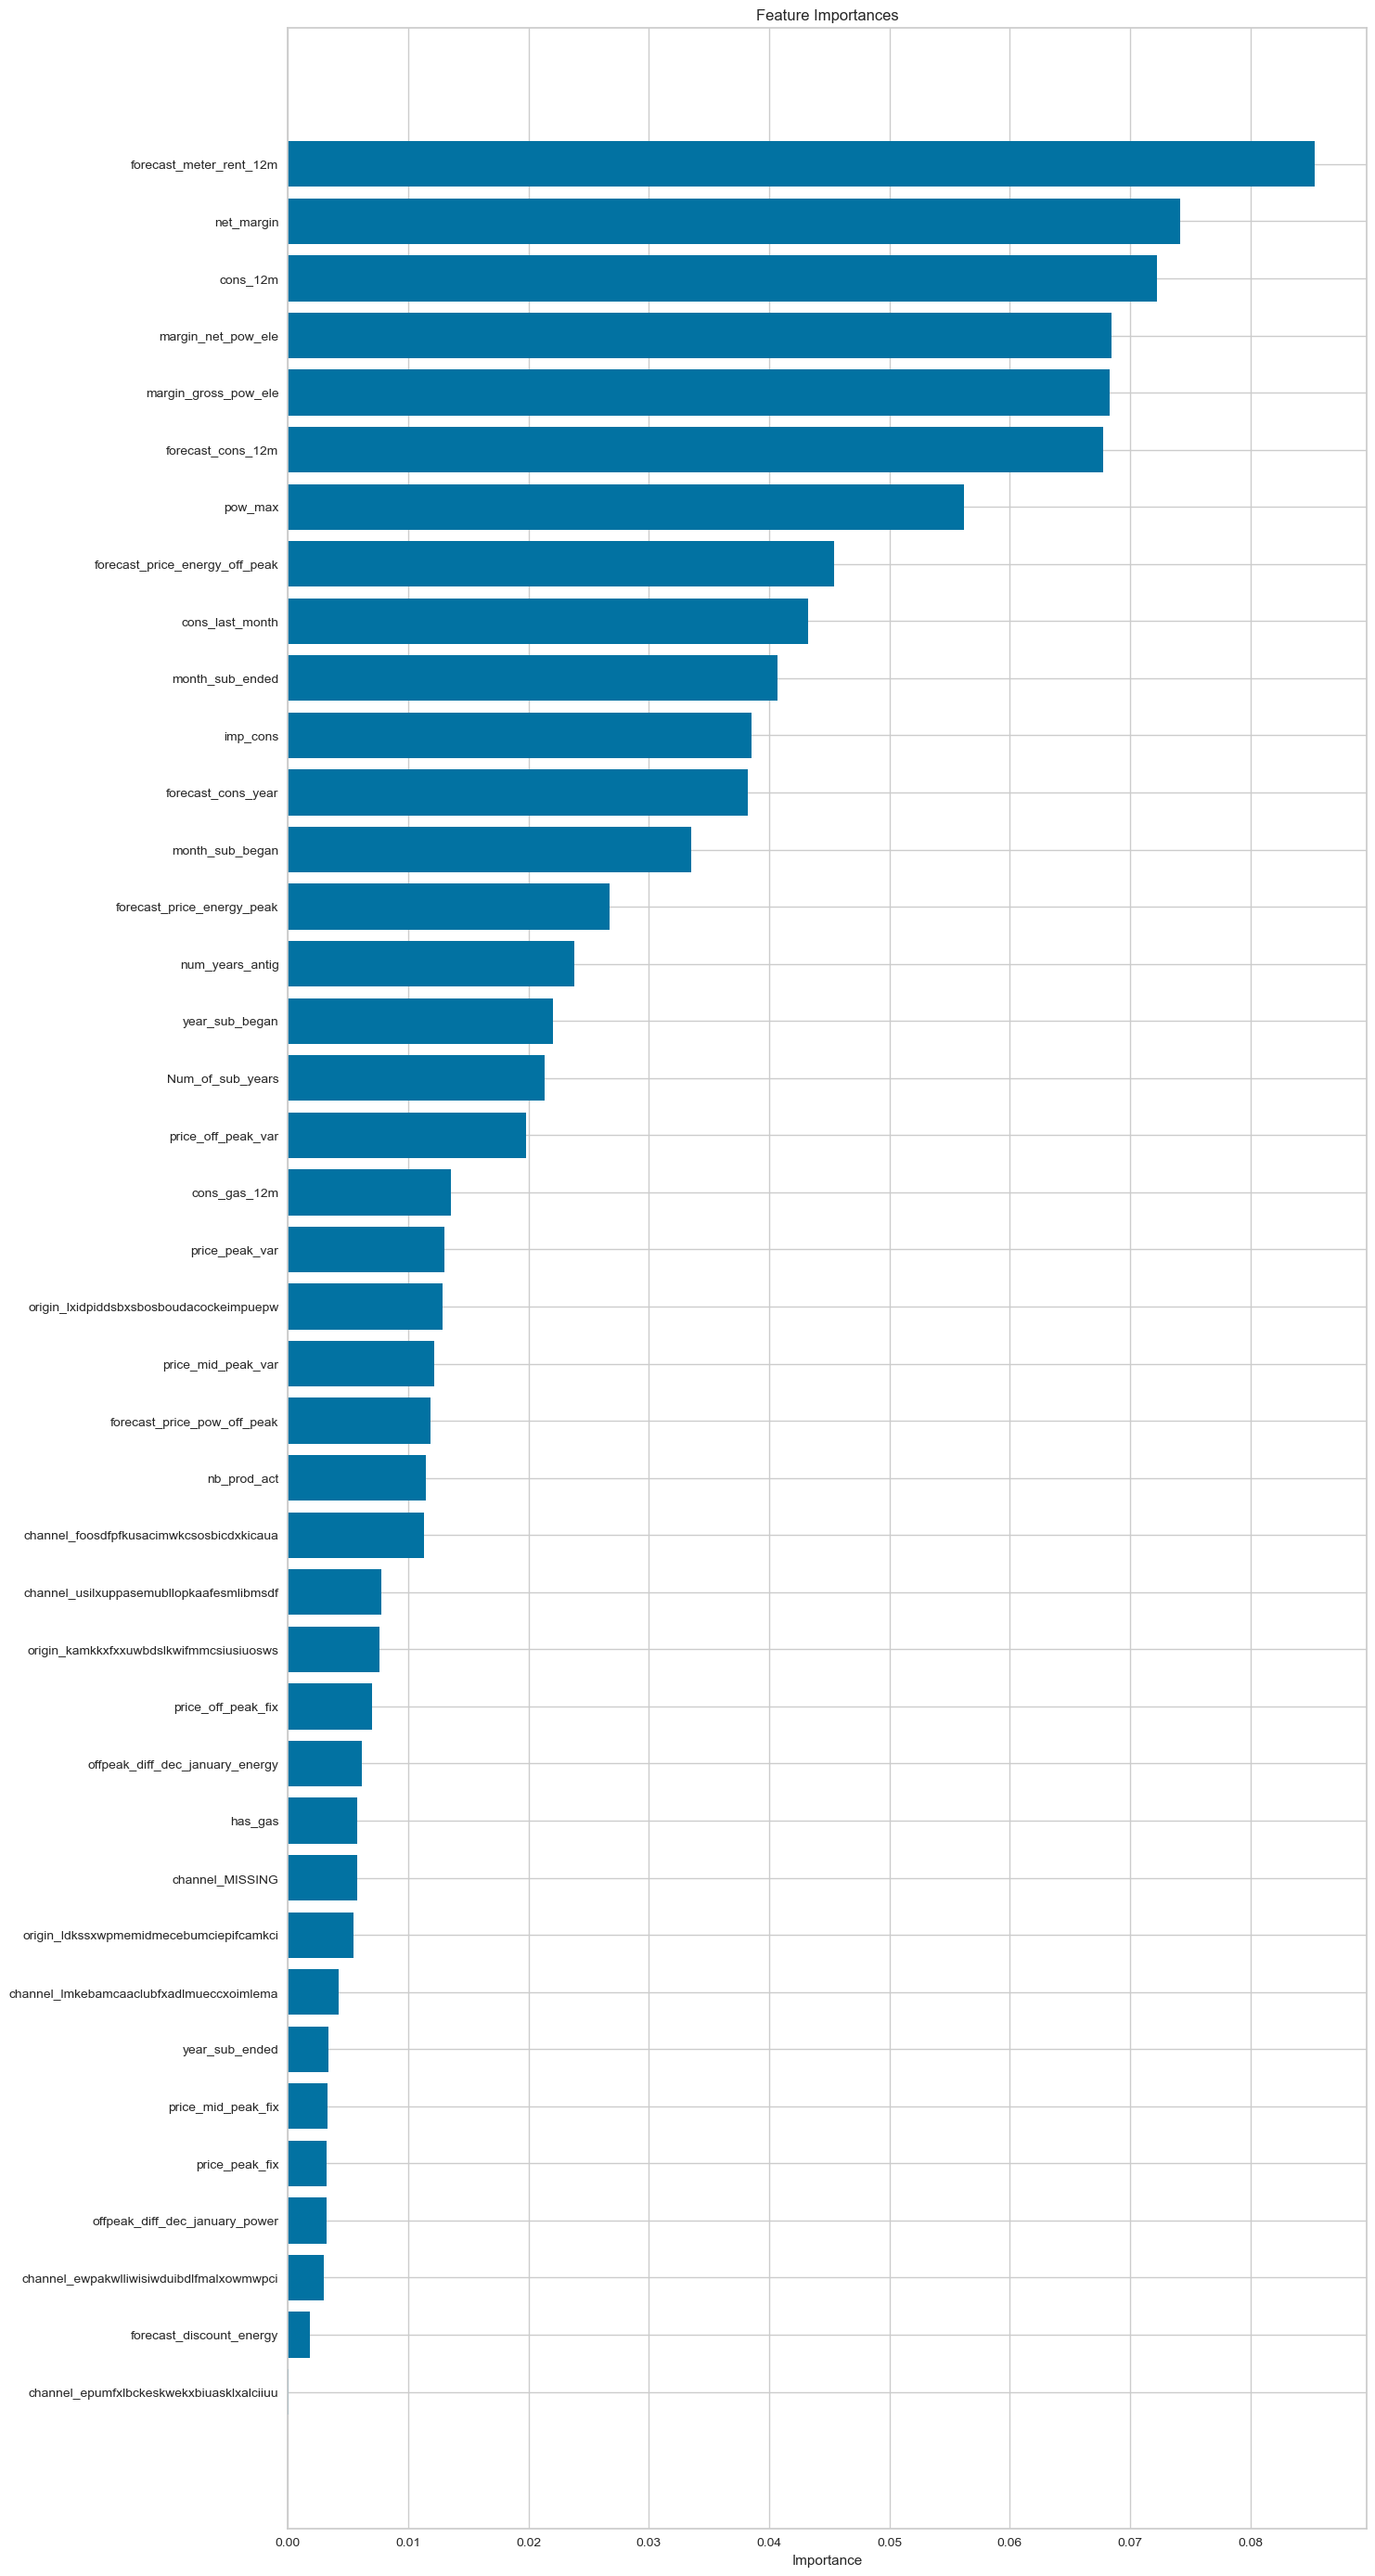

In [52]:
plt.figure(figsize=(15, 35))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'],color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features']) 
plt.xlabel('Importance')
plt.show()

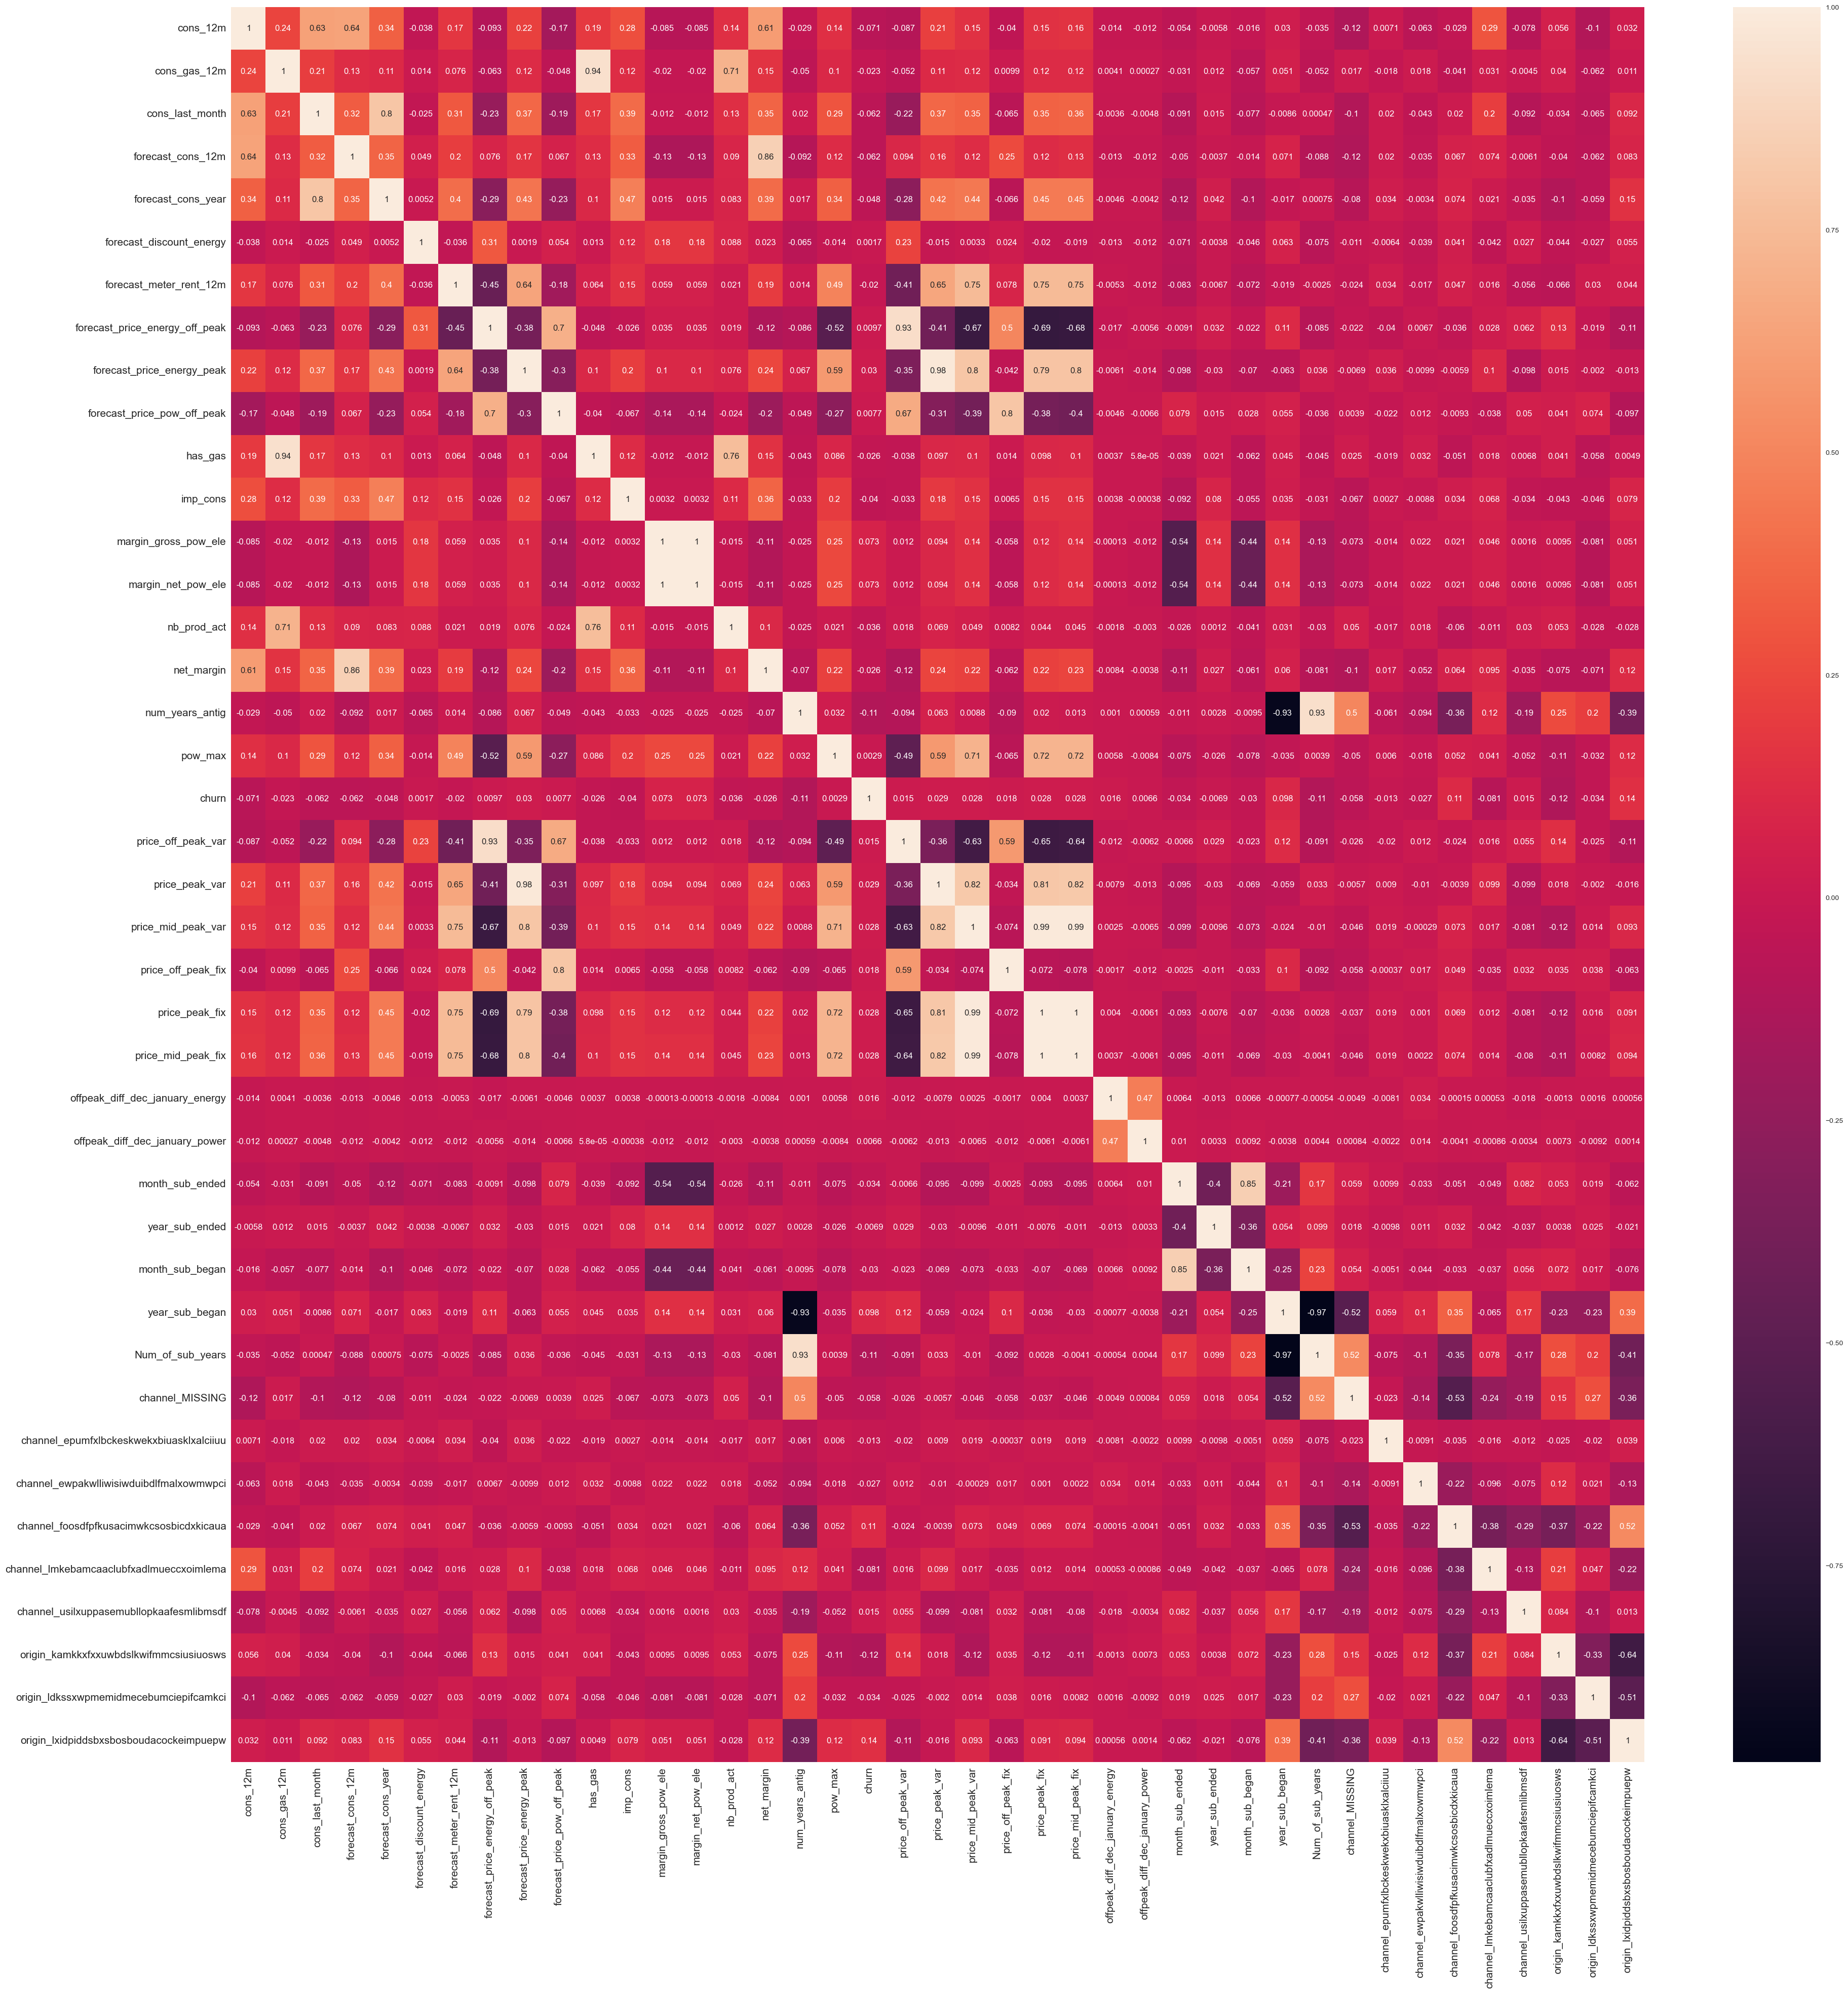

In [53]:
correlation = df.drop(columns=['id']).corr()
plt.figure(figsize=(45, 45))
sns.heatmap(
correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot=True,
annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [54]:
def correlation (dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range (len (corr_matrix.columns)) :
        for j in range(i):
            if abs (corr_matrix.iloc [i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns [i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [55]:
corr_features=correlation(X_train, 0.9)
len(set(corr_features))

8

In [56]:
corr_features

{'Num_of_sub_years',
 'has_gas',
 'margin_net_pow_ele',
 'price_mid_peak_fix',
 'price_off_peak_var',
 'price_peak_fix',
 'price_peak_var',
 'year_sub_began'}

### 5.Further Feature Selection

In [57]:
features_to_drop=['Num_of_sub_years','has_gas','margin_net_pow_ele','year_sub_began', 'num_years_antig']
model_df=df.drop(columns=features_to_drop,axis=1)
model_df.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,month_sub_began,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.0,4.739944,0.0,0.0,0.0,0.0,0.444045,0.114481,0.098142,...,6,0,0,0,1,0,0,0,0,1
1,24011ae4ebbe3035111d65fa7c15bc57,0.0,4.739944,0.0,0.0,0.0,0.0,0.444045,0.114481,0.098142,...,6,0,0,0,1,0,0,0,0,1
2,24011ae4ebbe3035111d65fa7c15bc57,0.0,4.739944,0.0,0.0,0.0,0.0,0.444045,0.114481,0.098142,...,6,0,0,0,1,0,0,0,0,1
3,24011ae4ebbe3035111d65fa7c15bc57,0.0,4.739944,0.0,0.0,0.0,0.0,0.444045,0.114481,0.098142,...,6,0,0,0,1,0,0,0,0,1
4,24011ae4ebbe3035111d65fa7c15bc57,0.0,4.739944,0.0,0.0,0.0,0.0,0.444045,0.114481,0.098142,...,6,0,0,0,1,0,0,0,0,1


In [58]:
Y = model_df['churn']
X = model_df.drop(columns=['id', 'churn'])
X_train, X_tests, Y_train, Y_tests = train_test_split(X, Y, test_size=0.25, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_tests.shape,  Y_tests.shape)

Train set: (12072, 35) (12072,)
Test set: (4024, 35) (4024,)


In [59]:
model2 = RandomForestClassifier(n_estimators=1000)


Y_pred_test = model_fit_predict(model2, X_train, Y_train, X_tests)                                                                                                                                                                            

#f1 score for training data
f1 = round(f1_score(Y_tests, Y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(Y_tests, Y_pred_test),2) 

#precision score for training data
pre = round(precision_score(Y_tests, Y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 1.0, 1.0 and 1.0 respectively


In [60]:
predictions2 = model2.predict(X_tests)
tn, fp, fn, tp = metrics.confusion_matrix(Y_tests, predictions2).ravel()
Y_tests.value_counts()


churn
0    3556
1     468
Name: count, dtype: int64

In [61]:
print("Shape of Y_tests:", Y_tests.shape)
print("Shape of predictions:", predictions2.shape)
print("Y_tests values:", Y_tests)
print("Predictions values:", predictions2)

Shape of Y_tests: (4024,)
Shape of predictions: (4024,)
Y_tests values: 4679     0
102      0
11366    0
2816     0
9317     0
        ..
2470     0
12465    1
15347    0
9701     0
11924    0
Name: churn, Length: 4024, dtype: int64
Predictions values: [0 0 0 ... 0 0 0]


In [62]:
from sklearn import ensemble, model_selection

classifier = ensemble.RandomForestClassifier(n_jobs=-1)
param_grid= {
    'n_estimators':[100,500,1000],
    'max_depth':[1,3,5,7],
    'criterion':["gini","entropy"],

}

model=model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5,
)

model.fit(X,Y)
print(model.best_score_)
print(model.best_estimator_.get_params())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/5; 1/24] END criterion=gini, max_depth=1, n_estimators=100;, score=0.893 total time=   3.3s
[CV 2/5; 1/24] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/24] END criterion=gini, max_depth=1, n_estimators=100;, score=0.893 total time=   0.3s
[CV 3/5; 1/24] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/24] END criterion=gini, max_depth=1, n_estimators=100;, score=0.893 total time=   0.3s
[CV 4/5; 1/24] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/24] END criterion=gini, max_depth=1, n_estimators=100;, score=0.893 total time=   0.4s
[CV 5/5; 1/24] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/24] END criterion=gini, max_depth=1, n_estimators=100;, score=0.893 total time=   0.3s
[CV 1/5; 2/24] START criterion=gini, max_de

In [63]:
model3 = RandomForestClassifier(max_depth=7, min_samples_split=2, n_estimators=100)


Y_pred_test = model_fit_predict(model3, X_train, Y_train, X_tests)                                                                                                                                                                            

#f1 score for training data
f1 = round(f1_score(Y_tests, Y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(Y_tests, Y_pred_test),2) 

#precision score for training data
pre = round(precision_score(Y_tests, Y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.9, 1.0 and 0.23 respectively


In [64]:
predictions3 = model3.predict(X_tests)
tn, fp, fn, tp = metrics.confusion_matrix(Y_tests, predictions3).ravel()
Y_tests.value_counts()

churn
0    3556
1     468
Name: count, dtype: int64

In [65]:
print(f"True positives: {tp}") 
print(f"False positives: {fp}") 
print(f"True negatives: {tn}") 
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(Y_tests, predictions3)}") 
print(f"Precision: {metrics.precision_score(Y_tests, predictions3)}") 
print(f"Recall: {metrics.recall_score(Y_tests, predictions3)}")

True positives: 60
False positives: 0
True negatives: 3556
False negatives: 408

Accuracy: 0.8986083499005965
Precision: 1.0
Recall: 0.1282051282051282


Model shows very low level of Precision, likely due to imbalanced churn in the data , leading to false predictions

0.913104705102717

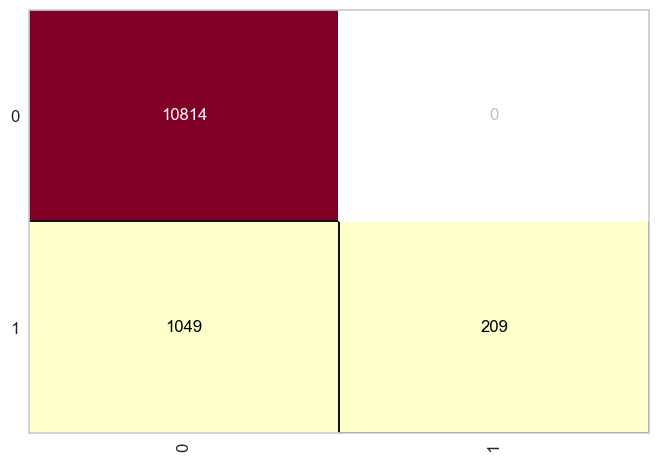

In [66]:

cm= ConfusionMatrix(model3, classes=[0,1])
cm.fit(X_train, Y_train)

cm.score(X_train, Y_train)

### Balancing Data using Random Sampling

In [67]:
from imblearn.under_sampling import RandomUnderSampler

In [68]:

count_class_0, count_class_1=model_df.churn.value_counts()
model_df_0=model_df[model_df['churn']==0]
model_df_1=model_df[model_df['churn']==1]

In [69]:
count_class_0, count_class_1

(14370, 1726)

In [70]:
model_df_0.shape

(14370, 37)

In [71]:
model_df_0_under=model_df_0.sample(count_class_1)
USampledDf=pd.concat([model_df_0_under,model_df_1], axis=0)
USampledDf.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,month_sub_began,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
5377,87ff1797c781c6f51bc199e83cc96b54,3.604334,0.000000,2.785330,2.785081,2.785330,0.0,1.321391,0.147506,0.000000,...,11,0,0,0,0,0,1,0,0,1
14336,ce406580e6356c422f17a3c462788611,4.088703,0.000000,0.000000,3.251969,0.000000,0.0,0.000000,0.142059,0.000000,...,11,0,0,0,0,1,0,1,0,0
2620,353c7a38a3fafd078eb86809031a7337,4.500936,0.000000,3.555336,3.505729,3.555336,0.0,2.114778,0.115174,0.098837,...,6,0,0,0,1,0,0,0,0,1
10855,6e86731b7ff0fbff28702e21c01b8612,3.764027,0.000000,0.000000,2.927442,0.000000,0.0,1.252610,0.140621,0.000000,...,3,0,0,0,0,0,1,0,0,1
9863,893a9debddaaf96213274575d3a68b72,6.550264,6.146552,5.587115,1.616160,2.285557,0.0,2.124374,0.116900,0.100015,...,2,0,0,0,0,1,0,1,0,0


In [72]:
Y = USampledDf['churn']
X = USampledDf.drop(columns=['id', 'churn'])
X_train, X_tests, Y_train, Y_tests = train_test_split(X, Y, test_size=0.25, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_tests.shape,  Y_tests.shape)

Train set: (2589, 35) (2589,)
Test set: (863, 35) (863,)


In [73]:
modelS = RandomForestClassifier(max_depth=7, min_samples_split=2, n_estimators=100)


Y_pred_test = model_fit_predict(modelS, X_train, Y_train, X_tests)                                                                                                                                                                            

#f1 score for training data
f1 = round(f1_score(Y_tests, Y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(Y_tests, Y_pred_test),2) 

#precision score for training data
pre = round(precision_score(Y_tests, Y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.92, 0.86 and 0.92 respectively


In [74]:
predictionss = modelS.predict(X_tests)
tn, fp, fn, tp = metrics.confusion_matrix(Y_tests, predictionss).ravel()
Y_tests.value_counts()

print(f"True positives: {tp}") 
print(f"False positives: {fp}") 
print(f"True negatives: {tn}") 
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(Y_tests, predictionss)}") 
print(f"Precision: {metrics.precision_score(Y_tests, predictionss)}") 
print(f"Recall: {metrics.recall_score(Y_tests, predictionss)}")

True positives: 398
False positives: 66
True negatives: 393
False negatives: 6

Accuracy: 0.9165701042873696
Precision: 0.8577586206896551
Recall: 0.9851485148514851


In [75]:
print(classification_report(Y_tests, Y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       459
           1       0.86      0.99      0.92       404

    accuracy                           0.92       863
   macro avg       0.92      0.92      0.92       863
weighted avg       0.93      0.92      0.92       863



0.9409038238702202

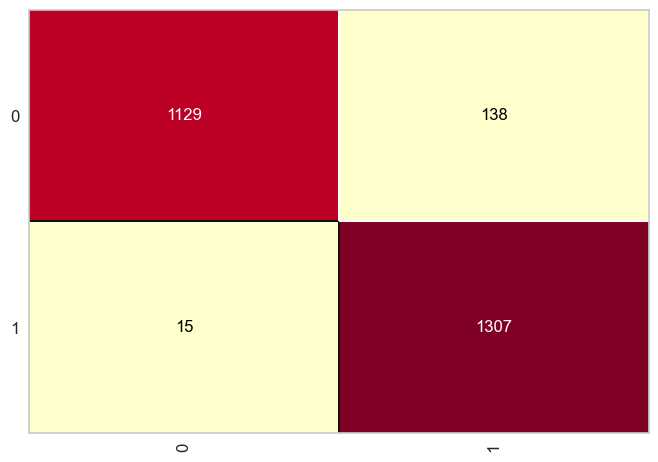

In [76]:

cm= ConfusionMatrix(modelS, classes=[0,1])
cm.fit(X_train, Y_train)

cm.score(X_train, Y_train)

In [77]:
from sklearn import ensemble, model_selection

classifier = ensemble.RandomForestClassifier(n_jobs=-1)
param_grid= {
    'n_estimators':[100,500,1000],
    'max_depth':[1,3,5,7],
    'criterion':["gini","entropy"],

}

model=model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5,
)

model.fit(X,Y)
print(model.best_score_)
print(model.best_estimator_.get_params())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/5; 1/24] END criterion=gini, max_depth=1, n_estimators=100;, score=0.648 total time=   0.4s
[CV 2/5; 1/24] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/24] END criterion=gini, max_depth=1, n_estimators=100;, score=0.576 total time=   0.2s
[CV 3/5; 1/24] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/24] END criterion=gini, max_depth=1, n_estimators=100;, score=0.674 total time=   0.2s
[CV 4/5; 1/24] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/24] END criterion=gini, max_depth=1, n_estimators=100;, score=0.691 total time=   0.2s
[CV 5/5; 1/24] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/24] END criterion=gini, max_depth=1, n_estimators=100;, score=0.580 total time=   0.2s
[CV 1/5; 2/24] START criterion=gini, max_de

In [78]:
modelS = RandomForestClassifier(max_depth=7, min_samples_split=2, n_estimators=1000)


Y_pred_test = model_fit_predict(modelS, X_train, Y_train, X_tests)                                                                                                                                                                            

#f1 score for training data
f1 = round(f1_score(Y_tests, Y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(Y_tests, Y_pred_test),2) 

#precision score for training data
pre = round(precision_score(Y_tests, Y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.92, 0.86 and 0.92 respectively


In [79]:
predictionss = modelS.predict(X_tests)
tn, fp, fn, tp = metrics.confusion_matrix(Y_tests, predictionss).ravel()
Y_tests.value_counts()

print(f"True positives: {tp}") 
print(f"False positives: {fp}") 
print(f"True negatives: {tn}") 
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(Y_tests, predictionss)}") 
print(f"Precision: {metrics.precision_score(Y_tests, predictionss)}") 
print(f"Recall: {metrics.recall_score(Y_tests, predictionss)}")

True positives: 403
False positives: 66
True negatives: 393
False negatives: 1

Accuracy: 0.9223638470451911
Precision: 0.8592750533049041
Recall: 0.9975247524752475


In [80]:
print(classification_report(Y_tests, Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       459
           1       0.86      1.00      0.92       404

    accuracy                           0.92       863
   macro avg       0.93      0.93      0.92       863
weighted avg       0.93      0.92      0.92       863



0.9466975666280417

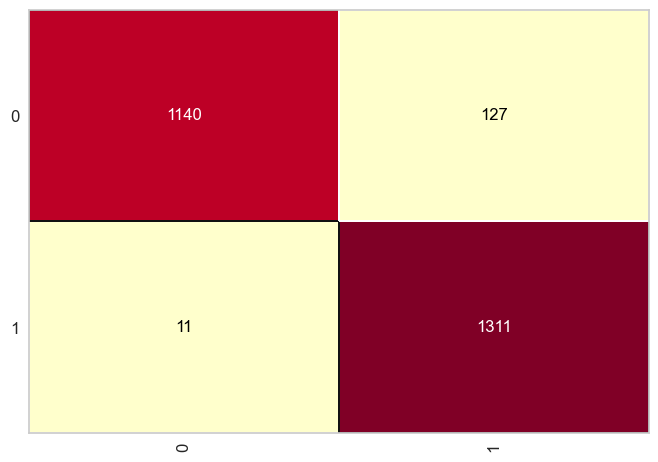

In [81]:
cm= ConfusionMatrix(modelS, classes=[0,1])
cm.fit(X_train, Y_train)

cm.score(X_train, Y_train)

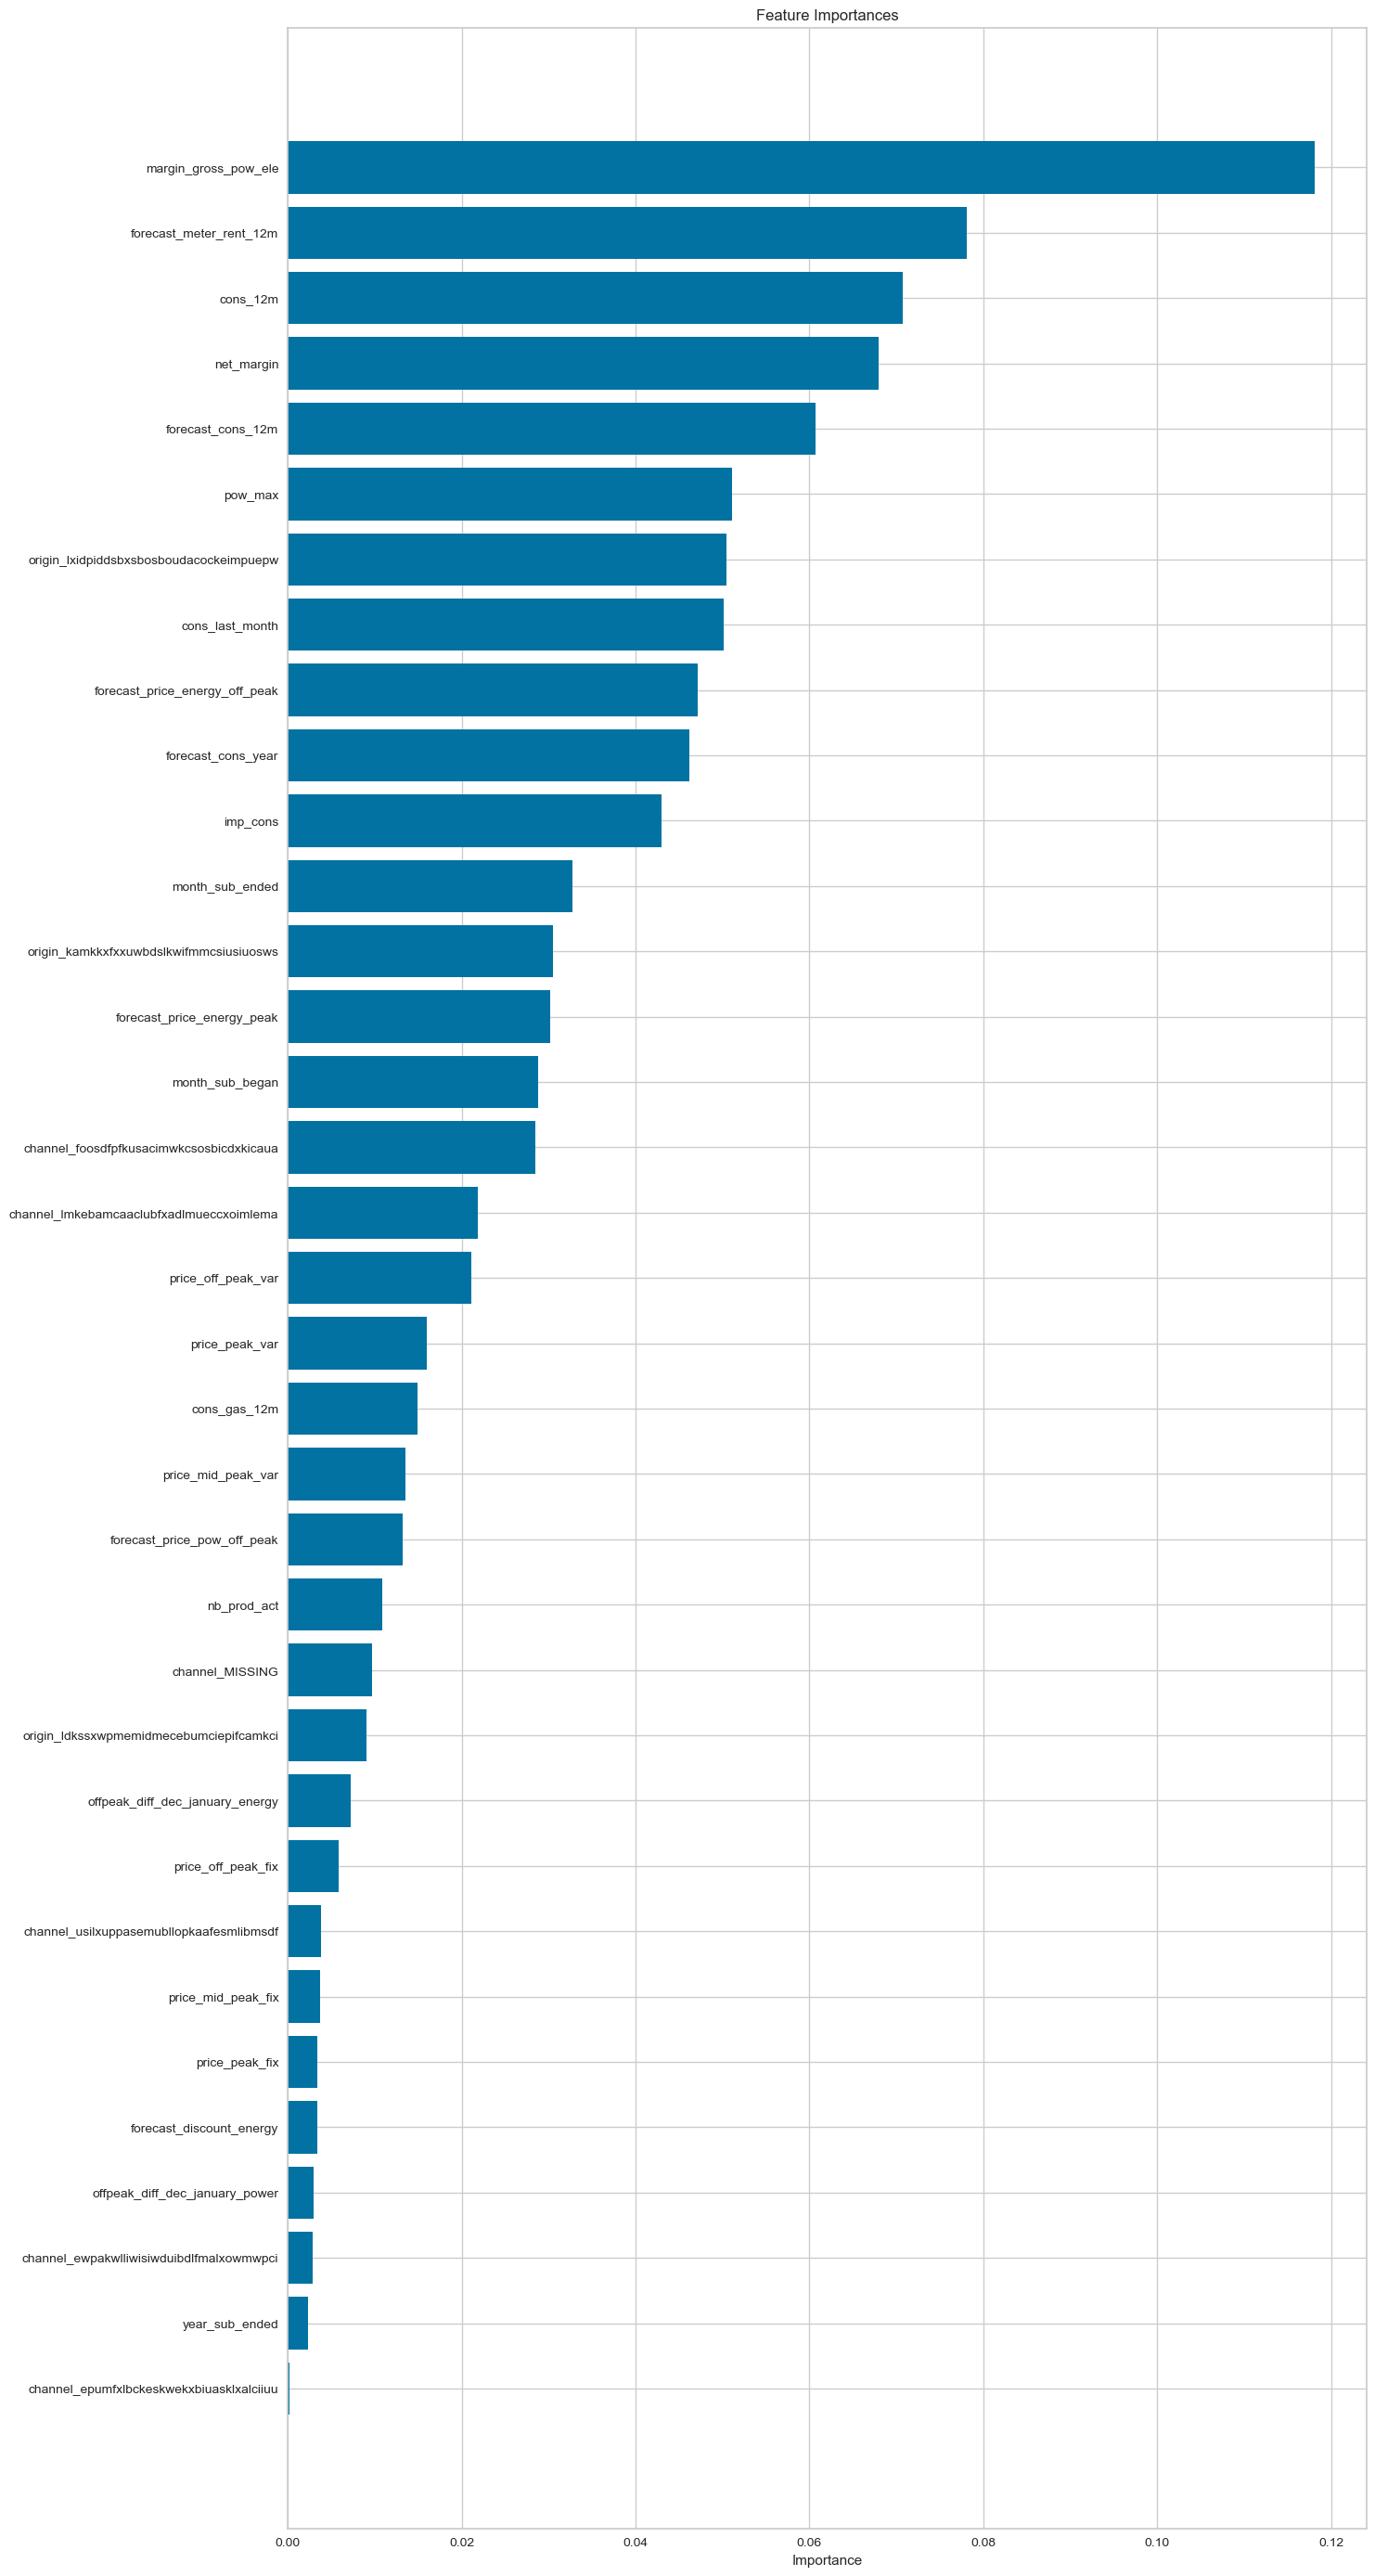

In [82]:
feature_importances = pd.DataFrame({'features': X_train.columns,'importance': modelS.feature_importances_}).sort_values(by='importance', ascending=True).reset_index()
plt.figure(figsize=(15, 35))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'],color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features']) 
plt.xlabel('Importance')
plt.show()

In [83]:
print("Training Data Columns:", X_train.columns)
print("Testing Data Columns:", X_tests.columns)

Training Data Columns: Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'nb_prod_act', 'net_margin', 'pow_max',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power',
       'month_sub_ended', 'year_sub_ended', 'month_sub_began',
       'channel_MISSING', 'channel_epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_usilxuppasemubllopkaafesmlibmsdf',
       'origin_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_ldkssxwpme

In [85]:
proba_predictions = modelS.predict_proba(X_tests)
probabilities = proba_predictions[:,1]

In [86]:
X_tests['churn'] = predictionss.tolist()
X_tests['churn_probability'] = probabilities.tolist()
X_tests.to_csv('sampled_data_with_predictions.csv')